In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\creditcard.csv")

In [5]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [10]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
# Check basic statistics
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [13]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00 

In [15]:
# Check class distribution
print("\nClass Distribution:")
print(df["Class"].value_counts())


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_2080\3987896766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette="coolwarm")


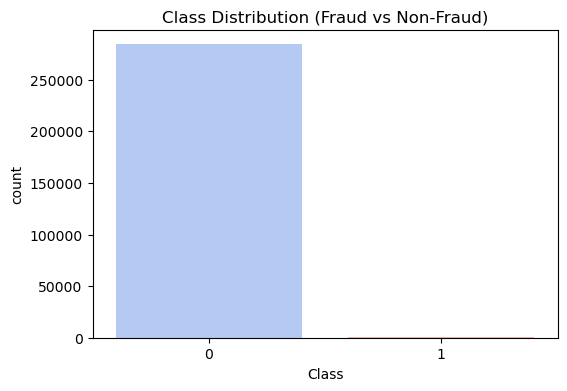

In [17]:
# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df, palette="coolwarm")
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
# Standardize 'Amount' column
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])

# Convert 'Time' into hours (since it represents seconds)
df["Hour"] = df["Time"] // 3600 % 24  # Converts seconds into hours (0-23)

In [23]:
# Drop the original 'Time' column (optional)
df.drop(columns=["Time"], inplace=True)

In [25]:
# Display processed data
print("\nProcessed Data:")
print(df.head())


Processed Data:
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28    Amount  Class  H

In [27]:
# Check imbalance
fraud_cases = df[df["Class"] == 1]
non_fraud_cases = df[df["Class"] == 0]

In [29]:
print(f"Fraud Cases: {len(fraud_cases)} ({len(fraud_cases)/len(df)*100:.3f}%)")
print(f"Non-Fraud Cases: {len(non_fraud_cases)} ({len(non_fraud_cases)/len(df)*100:.3f}%)")

Fraud Cases: 492 (0.173%)
Non-Fraud Cases: 284315 (99.827%)


In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [33]:
# Split features and target
X = df.drop(columns=["Class"])
y = df["Class"]

In [35]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # 1.0 means equal fraud & non-fraud cases
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [39]:
# Print class distribution after SMOTE
print("\nClass Distribution AFTER SMOTE:")
print(y_train_resampled.value_counts())


Class Distribution AFTER SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


In [41]:
!pip install xgboost

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [45]:
# Auto-calculate class weight for better fraud detection balance
class_weight = round(len(y_train_resampled) / sum(y_train_resampled))

In [47]:
# Initialize XGBoost with improved settings
# xgb_model = XGBClassifier(
#     n_estimators=100,  # Number of trees
#     max_depth=6,  # Depth of each tree
#     learning_rate=0.1,  # Learning rate
#     subsample=0.8,  # Use 80% of data for each tree (reduces overfitting)
#     colsample_bytree=0.8,  # Use 80% of features for each tree
#     scale_pos_weight=9,  # Adjusted for class imbalance
#     random_state=42,
#     use_label_encoder=False,  # Avoid warnings
#     eval_metric="logloss"  # Suitable for classification
# )

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.05,
    scale_pos_weight=10,  
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

In [49]:
# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:43:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [51]:
# Make predictions using probabilities
y_pred_probs = xgb_model.predict_proba(X_test)[:, 1]  # Get fraud probabilities

In [53]:
# Adjust the threshold for better fraud detection
threshold = 0.75 
y_pred_xgb = (y_pred_probs > threshold).astype(int)

In [55]:
# Evaluate performance
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost ROC-AUC Score:", roc_auc_score(y_test, y_pred_probs))  # Use probabilities for ROC-AUC

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.85      0.57        98

    accuracy                           1.00     56962
   macro avg       0.72      0.92      0.79     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56755   109]
 [   15    83]]
XGBoost ROC-AUC Score: 0.9767628527212798


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Initialize Random Forest with class balancing
rf_model = RandomForestClassifier(
    n_estimators=100,  
    max_depth=10,  
    class_weight="balanced_subsample",  # Auto-balancing fraud cases
    random_state=42
)

In [59]:
# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       random_state=42)

In [60]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [61]:
# Evaluate performance
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.40      0.86      0.54        98

    accuracy                           1.00     56962
   macro avg       0.70      0.93      0.77     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56737   127]
 [   14    84]]
Random Forest ROC-AUC Score: 0.9274547290779002


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [63]:
# 1️⃣ Feature Importance Analysis
def plot_feature_importance(model, feature_names, title):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance[indices][:10], y=[feature_names[i] for i in indices[:10]])
    plt.title(title)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.show()

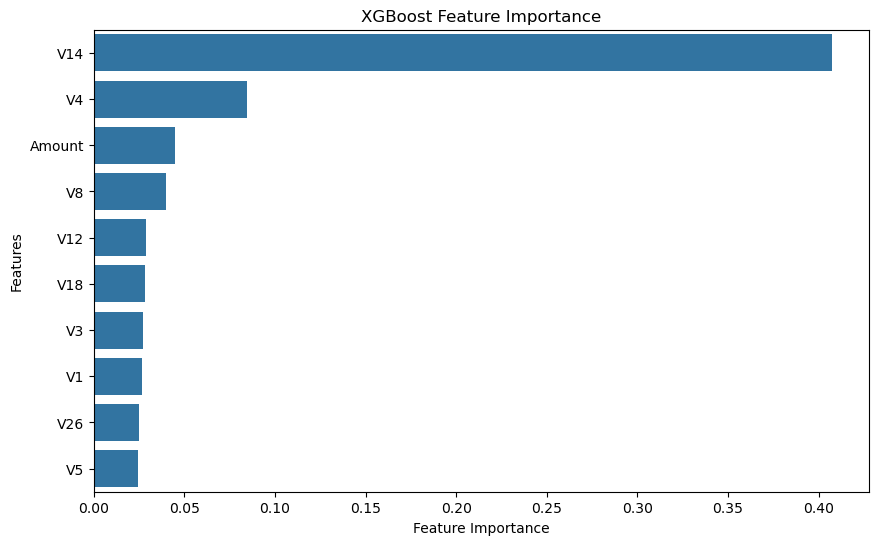

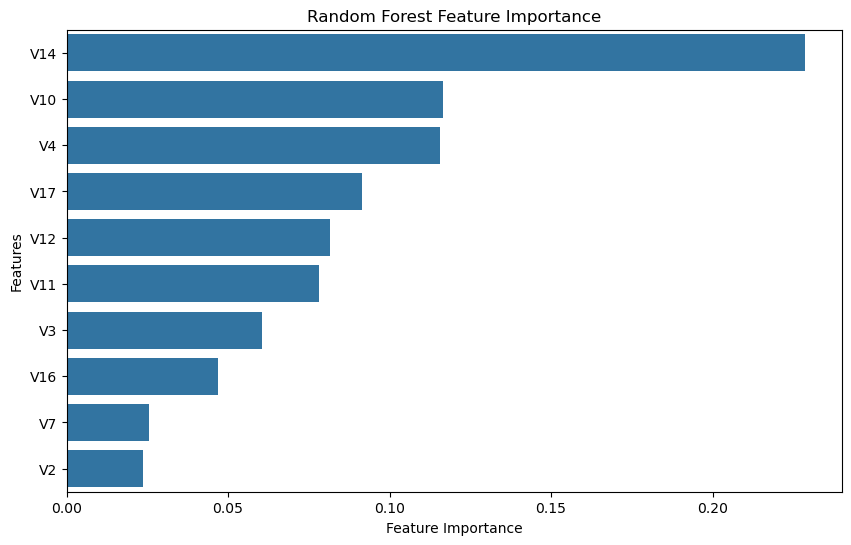

In [64]:
plot_feature_importance(xgb_model, X_train.columns, "XGBoost Feature Importance")
plot_feature_importance(rf_model, X_train.columns, "Random Forest Feature Importance")

In [65]:
# 2️⃣ ROC & Precision-Recall Curves
def plot_roc_pr_curves(y_true, y_probs_xgb, y_probs_rf):
    plt.figure(figsize=(12, 5))
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    fpr_xgb, tpr_xgb, _ = roc_curve(y_true, y_probs_xgb)
    fpr_rf, tpr_rf, _ = roc_curve(y_true, y_probs_rf)
    plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost AUC: {auc(fpr_xgb, tpr_xgb):.3f}')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC: {auc(fpr_rf, tpr_rf):.3f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

In [66]:
 # Precision-Recall Curve
    plt.subplot(1, 2, 2)
    precision_xgb, recall_xgb, _ = precision_recall_curve(y_true, y_probs_xgb)
    precision_rf, recall_rf, _ = precision_recall_curve(y_true, y_probs_rf)
    plt.plot(recall_xgb, precision_xgb, label="XGBoost")
    plt.plot(recall_rf, precision_rf, label="Random Forest")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

IndentationError: unexpected indent (2060510661.py, line 2)

In [ ]:
plt.show()

In [ ]:
# Optimized hyperparameter grids
xgb_param_grid = {
    'learning_rate': [0.05, 0.1],  # Removed 0.2
    'max_depth': [3, 5],  
    'subsample': [0.8],  # Removed 1.0
}


In [ ]:
rf_param_grid = {
    'max_depth': [10],  # Fixed at 10
    'min_samples_split': [2],  
    'min_samples_leaf': [1],  
}

In [ ]:
# Initialize models with fewer trees
xgb = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Perform Randomized Search with optimizations
xgb_search = RandomizedSearchCV(
    xgb, xgb_param_grid, cv=2, scoring='roc_auc', 
    n_iter=3, n_jobs=1, verbose=2, random_state=42
)
rf_search = RandomizedSearchCV(
    rf, rf_param_grid, cv=2, scoring='roc_auc', 
    n_iter=3, n_jobs=1, verbose=2, random_state=42
)

In [ ]:
# Fit models
xgb_search.fit(X_train, y_train)
rf_search.fit(X_train, y_train)

In [ ]:
# Print best parameters
print("Best XGBoost Params:", xgb_search.best_params_)
print("Best Random Forest Params:", rf_search.best_params_)

In [ ]:
# Evaluate on test data
xgb_best = xgb_search.best_estimator_
rf_best = rf_search.best_estimator_

xgb_pred = xgb_best.predict(X_test)
rf_pred = rf_best.predict(X_test)

print("XGBoost Performance:\n", classification_report(y_test, xgb_pred))
print("Random Forest Performance:\n", classification_report(y_test, rf_pred))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define optimized parameter grids
xgb_param_grid = {
    'n_estimators': [50],  # Reduce trees
    'learning_rate': [0.05, 0.1],  
    'max_depth': [3, 5],  
    'min_child_weight': [1, 3],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0]
}

rf_param_grid = {
    'n_estimators': [50],  # Reduce trees
    'max_depth': [10, 20],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'max_features': ['sqrt']
}

In [ ]:
# Initialize models with balanced class weights
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=578, random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)


In [ ]:

# Perform Randomized Search with optimized settings
xgb_search = RandomizedSearchCV(
    xgb, xgb_param_grid, cv=2, scoring='roc_auc', 
    n_iter=3, n_jobs=1, verbose=2, random_state=42
)
rf_search = RandomizedSearchCV(
    rf, rf_param_grid, cv=2, scoring='roc_auc', 
    n_iter=3, n_jobs=1, verbose=2, random_state=42
)

In [ ]:
# Fit models
xgb_search.fit(X_train, y_train)
rf_search.fit(X_train, y_train)

In [ ]:
# Print best parameters
print("Best XGBoost Params:", xgb_search.best_params_)
print("Best Random Forest Params:", rf_search.best_params_)

In [ ]:
# Evaluate on test data
xgb_best = xgb_search.best_estimator_
rf_best = rf_search.best_estimator_

xgb_pred = xgb_best.predict(X_test)
rf_pred = rf_best.predict(X_test)

print("XGBoost Performance:\n", classification_report(y_test, xgb_pred))
print("Random Forest Performance:\n", classification_report(y_test, rf_pred))


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use xgb_best
xgb_cv_scores = cross_val_score(
    xgb_best, X_train, y_train, cv=skf, scoring='roc_auc'
)
rf_cv_scores = cross_val_score(
    rf_best, X_train, y_train, cv=skf, scoring='roc_auc'
)

print("XGBoost Cross-Validation AUC Scores:", xgb_cv_scores)
print("XGBoost Mean AUC:", xgb_cv_scores.mean())

print("Random Forest Cross-Validation AUC Scores:", rf_cv_scores)
print("Random Forest Mean AUC:", rf_cv_scores.mean())